# FAIR maturity indicators for nanosafety

by [Ammar Ammar] (https://github.com/ammar257ammar), [Serena Bonaretti](https://sbonaretti.github.io) and [Egon Willighagen](https://egonw.github.io), Maastricht University

---
### Use case

This notebook template considers an example use cases of data retrieval in the nanosafety field. For each case, we
- Execute data retrieval via API 
- Evaluate the FAIRness of the dataset

This template is derived from [this Jupyter notebook](https://github.com/sbonaretti/FAIR_metrics/blob/master/code/FAIR_assessment_2.ipynb) which has two example use cases.

The use-cases is:


<table>
<colgroup>
<col style="width: 20%" />
<col style="width: 80%" /> 
</colgroup>
    
  <tr>
    <th></th>
    <th>TiO<sub>2</sub></th>
  </tr>
    
  <tr>
    <th>Research question</th>
    <th>What does the database tell us about the safety of TiO<sub>2</sub>?</th>
  </tr>
  
  <tr>
    <th>Dataset</th>
    <th>ChEMBL</th>
  </tr>
  
  <tr>
    <th>Repository</th>
      <th><a href="https://www.ebi.ac.uk/chembl/">ebi.ac.uk/chembl</a></th>
  </tr>

</table>




Information about repository:
- **Repository: ebi.ac.uk/chembl**:
  - API: 
    - Documentation at https://www.ebi.ac.uk/chembl/api/data/docs
    - The API to query the repository is a rest API: https://www.ebi.ac.uk/chembl/api/data/document/search


---

### Calculating FAIR metrics

[Prerequisites:](#prerequisites)  
- [Imports](#imports)  
- [Variables](#variables)  
- [Functions](#functions)  

[Retrieving datasets:](#retrieval)  
- [Case: TEMPLATE: REPOSITORY](#Repository)

[Retrieving repositories in www.re3data.org](#Retrieving_repositories_in_www.re3data.org)


[FAIR assessment:](#metrics) 
- [F1. (Meta)data are assigned a globally unique and persistent identifier](#F1) 
- [F2. Data are described with rich metadata](#F2) 
- [F3. Metadata clearly and explicitly include the identifier of the data it describes](#F3)  
- [F4. (Meta)data are registered or indexed in a searchable resource](#F4) 
- [A1. (Meta)data are retrievable by their identifier using a standardized communications protocol](#A1)    
- [A1.1 The protocol is open, free, and universally implementable](#A11)   
- [A1.2 The protocol allows for an authentication and authorization procedure, where necessary](#A12)   
- [A2. Metadata are accessible, even when the data are no longer available](#A2)  
- [I1. (Meta)data use a formal, accessible, shared, and broadly applicable language for knowledge representation](#I1) 
- [I2. Metadata use vocabularies that follow FAIR principles](#I2)  
- [I3. (Meta)data include qualified references to other (meta)data](#I3)   
- [R1.1. (Meta)data are released with a clear and accessible data usage license](#R11)  
- [R1.2. (Meta)data are associated with detailed provenance](#R12)  
- [R1.3. (Meta)data meet domain-relevant community standards](#R13)

[FAIR assessment visualization](#visualization)

[Dependencies](#dependencies)

[Supplementary information](#supplementary_information)

---

<a name="prerequisites"></a>
### Prerequisites

<a name="imports"></a>
#### Imports

In [29]:
# import python packages
import os
import pandas as pd
import requests
import time
import xml.etree.ElementTree as ET
import json
from io import StringIO
import urllib.parse


In [ ]:
# Import R for visualization using ggplot2 - comment if used in mybinder, uncomment if used locally
#os.environ['R_HOME'] = '/Library/Frameworks/R.framework/Resources' # put here your own R directory 

In [ ]:
%load_ext rpy2.ipython

<a name="variables"></a>
#### Variables

In [31]:
# re3Data API
re3data_repos    = "https://www.re3data.org/api/v1/repositories"
re3data_repo     = "https://www.re3data.org/api/v1/repository"
re3data_schema   = '{http://www.re3data.org/schema/2-2}' # in the metadata xml

In [32]:
# repository variables
repository_name  = []
repository_api   = []
dataset_download = []

# TEMPLATE: REPOSITORY
repository_name.append("ChEMBL")
repository_api.append("https://www.ebi.ac.uk/chembl/api/data/document/search?format=json&q=")
dataset_download.append("https://www.ebi.ac.uk/chembl/api/data/document/search?format=json&q=")

In [33]:
# case names
case_names        = []
case_names.append("titanium_dioxide")

In [34]:
# search keywords
keywords = []

# TEMPLATE: REPOSITORY
kw = []
kw.append("titanium dioxide")
keywords.append(kw)


In [35]:
# output variables used for FAIR assessment

request_status        = []
metadata_xml          = [] 
metadata_list         = [] # list of lists. Dimension: n_of_cases x 1. 
                           # Inside each cell, list of dimension 2 x N. First row is tags, second row is text of the xml output containing metadata
re3data_repo_root     = []
re3data_metadata_list = [] # same structure as metadata_list
n_of_found_keywords   = []
dataset_title         = []

F1  = []
F2  = []
F3  = []
F4  = []
A1  = []
A11 = []
A12 = []
A2  = []
I1  = []
I2  = []
I3  = []
R1  = []
R11 = []
R12 = []
R13 = []

<a name="functions"></a>
#### Functions

In [36]:
def find_repo_in_re3_data (repository_name):
    """
    It retrieves metadata about the input repository in re3data.org
    """
    
    # contact the re3data
    re3data_r = requests.get(re3data_repos)
    if re3data_r == None:
        return None
    
    # put output string in a structured xml tree
    re3data_root = ET.fromstring(re3data_r.text)

    # look for the wanted repository
    flag = 0
    for i in range (0, len(re3data_root)):
        if re3data_root[i][1].text == repository_name: # first index is a <repository> group, 
                                                       # second index is for the tags inside (<id>, <name>, <link>)
            flag = 1
            repository_index = i

    if flag == 1:   
        
        re3data_metadata_address = str(re3data_root[repository_index][2].attrib["href"])
        #print ("Index in list: " + str(repository_index))
        #print ("Tag          : " + str(re3data_root[repository_index][1].tag))
        #print ("Text         : " + str(re3data_root[repository_index][1].text))
        #print ("Tag          : " + str(re3data_root[repository_index][2].tag))
        #print ("Attribute    : " + str(re3data_root[repository_index][2].attrib)) # attributes do not have a closing tag

    else: 
        print ("Repository not found")
        return None
        
    return re3data_metadata_address

In [37]:
def xml_to_list(root): 

    tag_list = []
    text_list = []
        
    for elem in root.iter():
        tag_list.append(elem.tag)
        text = elem.text
        if text:
            text_list.append(text.strip())
        else:
            text_list.append("")
            text = ""
        #print("We are adding element: "+elem.tag + " - with text: "+text)
    
    #print("numbers: " + str(len(tag_list)) + "-" + str(len(text_list)))
    xml_list = [ tag_list, text_list ]
    
    return xml_list

In [38]:
def json_to_list(root): 

    tag_list = []
    text_list = []
           
    for attribute, value in root.items():
        tag_list.append(attribute)
        text_list.append(value)
    
    #print("numbers: " + str(len(tag_list)) + "-" + str(len(text_list)))
    json_list = [ tag_list, text_list ]
    
    return json_list

In [39]:
def find_list_in_list(long_list, short_list):
    """
    For each items of short_list, it looks in the long_list
    It uses a "for" loop because it has to look also for parts of string
    Inputs: 
     long_list: long list of strings
     short_list: short list of strings
    Outputs:
     found: elements of short_list found in long_list
     index: index of found elements in long_list   
    """
    
    found = []
    index = []
    for i in range(0, len(long_list)):
        for j in range(0, len(short_list)):
            
            #print("compare: "+long_list[i].lower() + " TO " + short_list[j].lower())
            if str(long_list[i]).lower().find(str(short_list[j]).lower()) != -1 :
                found.append(str(short_list[j]))
                index.append(i)
    return found, index

---

<a name="retrieval"></a>
### Retrieving datasets 

<a name="Repository"></a>
#### Case: TEMPLATE: REPOSITORY

In [40]:
case_id = 0

The below test assumes a certain API with parameters. For example, the below code uses `keywords`
as API parameter to pass keywords. The template code likely needs updating.

In [41]:
# getting dataset
start_time = time.time()
print(repository_api[case_id]+urllib.parse.quote(keywords[case_id][0]))
r_repo = requests.get(repository_api[case_id]+urllib.parse.quote(keywords[case_id][0]))

print ("-> The time to retrieve the dataset was %.2f seconds" % ((time.time() - start_time)))
print ("-> Request status %.3s " % (r_repo.status_code))

# add request status
request_status.append(r_repo.status_code)

# convert answer from string to json
results = json.loads(r_repo.text)

results_all = results['documents']

results_df = pd.DataFrame(results['documents'], columns=["document_chembl_id", "pubmed_id", "authors"])

print("number of samples found: " + str (len(results['documents'])) + "\n\n")

results_df

https://www.ebi.ac.uk/chembl/api/data/document/search?format=json&q=titanium%20dioxide
-> The time to retrieve the dataset was 0.33 seconds
-> Request status 200 
number of samples found: 20




,document_chembl_id,pubmed_id,authors
0,CHEMBL1157425,18512988,"Choquenet B, Couteau C, Paparis E, Coiffard LJ."
1,CHEMBL2346584,23434418,"Sangshetti JN, Dharmadhikari PP, Chouthe RS, F..."
2,CHEMBL1132950,11020280,"Caruso F, Rossi M, Tanski J, Sartori R, Sarieg..."
3,CHEMBL1130769,9871614,"Kuang R, Venkataraman R, Ruan S, Groutas WC."
4,CHEMBL1133239,10915061,"Ma J, Weiss E, Kyle DE, Ziffer H."
5,CHEMBL1122467,6827542,"Chapman JM, Cocolas GH, Hall IH."
6,CHEMBL1137628,17933534,"Chen CP, Zeiger AR, Wickstrom E."
7,CHEMBL1132905,10866388,"Leclercq F, Dubertret C, Pitard B, Scherman D,..."
8,CHEMBL1127661,8126711,"Benedetti-Doctorovich V, Burgess EM, Lambropou..."
9,CHEMBL1144360,15633996,"Cerecetto H, González M, Lavaggi ML, Azqueta A..."


In [42]:
# look for experiment_id 
experiment_id = []

experiment_id = results_df['document_chembl_id'].apply(str).tolist()

print (experiment_id[0])

CHEMBL1157425


In [43]:
# get metadata of dataset 1
#experiment_id[0] = '86507520'

metadata_list = []

metadata_xml.append(results_all[0])
metadata_list.append(json_to_list(results_all[0]))

#print (pd.DataFrame(metadata_list).head(1000))

In [44]:

print(pd.DataFrame(metadata_list[0]).shape)

print(pd.DataFrame(metadata_list))


(2, 18)
                                                   0  \
0  [abstract, authors, doc_type, document_chembl_...   

                                                   1  
0  [Given that flavonoids are known for their ult...  


<a name="Retrieving_repositories_in_www.re3data.org"></a>
### Retrieving repositories in www.re3data.org

In [45]:
start_time = time.time()

for case_id in range (0, len(repository_name)):  
    
    print ("- " + repository_name[case_id])
        
    # extract repository metadata
    re3data_metadata_address = find_repo_in_re3_data (repository_name[case_id])

    if re3data_metadata_address != None:
        # extract repository number 
        repository_number = re3data_metadata_address[re3data_metadata_address.rfind('/') : len(re3data_metadata_address)]

        # metadata_url
        metadata_url      = re3data_repo + str(repository_number)

        # access the repository metadata 
        re3data_repo_r = requests.get(metadata_url)

        # put the output string in a structured xml tree
        re3data_repo_root.append(ET.fromstring(re3data_repo_r.text)) # saved if needed for pretty_print_xml visualization
    
        # put the output string in a list of lists
        re3data_metadata_list.append(xml_to_list(re3data_repo_root[case_id]))
       
print ("-> The time to retrieve the information was %.2f seconds" % ((time.time() - start_time)))

- ChEMBL
-> The time to retrieve the information was 2.56 seconds


---

<a name="metrics"></a>
### FAIR assessment

---

<a name="F1"></a>
#### F1. (Meta)data are assigned a globally unique and persistent identifier
We used www.re3data.org to check whether the repository provides a globally unique and persistent identifier.  
Because it is not possible to retrieve this information via API, we manually checked the "doi" icon at the top-right of each repository page. 
We manually assigned: 
- `1` when the hovered icon stated: *The research data repository uses DOI to make its provided data persistent, unique and citable* 
- `0` when the hovered icon stated: *The research data repository does not use a persistent identifier system*  

In [46]:

F1.append(1) # information retrieved at: https://www.re3data.org/repository/r3d100010574

# Print out F1 values
print ("--> F1 are: " + str(F1) )

--> F1 are: [1]


---

<a name="F2"></a>
#### F2. Data are described with rich metadata 

Metadata contain the keywords used in the query

In [47]:
if (len(metadata_list) == 0):
    F2.append(0)
    print ("    No registered with re3data.org")
else:
    for case_id in range (0, len(repository_name)):
    
        print(len(metadata_list[case_id][1]))
        # look for keywords in metadata text 
        output, index = find_list_in_list(metadata_list[case_id][1], keywords[case_id]) # metadata_list[0] is tags, metadata_list[1] is text
    
        # get unique found keywords (one keyword can be present more than once
        found = list(set(output) ) 

        # print out found keywords
        print ("- " + repository_name[case_id])
        print ("    " + str(found))
    
        # n of keywords found - used in R1
        n_of_found_keywords.append(len(found))

        # assign F2
        if len(found) == 0: # none of the search keywords are in the metafile data
            F2.append(0)
            print ("    No keyword found")
        else:
            F2.append(len(found)/len(keywords[case_id]))
            print ("    Found " + str(len(found)) + " keywords")

# print F2
print ("--> F2: " + str(F2))

18
- ChEMBL
    ['titanium dioxide']
    Found 1 keywords
--> F2: [1.0]


---

<a name="F3"></a>
#### F3. Metadata clearly and explicitly include the identifier of the data it describes  

In [48]:
if (len(metadata_list) == 0):
    F2.append(0)
    print ("    No registered with re3data.org")
else:
    for case_id in range (0, len(repository_name)):
    
        # look for keywords in metadata tag
        output, index = find_list_in_list(metadata_list[case_id][0], ["id"]) # metadata_list[0] is tags, metadata_list[1] is text
        print ("- " + repository_name[case_id])
    
        # both in Parkinson_AE and NBIA_GEO metadata there are various "id" tags. The one that refers to the datset is the first (=> index[0])
        print ("id: " + metadata_list[case_id][1][index[0]])
    
        F3.append(1)
          
print ("--> F3: " + str(F3) )

- ChEMBL
id: CHEMBL1157425
--> F3: [1]


---

<a name="F4"></a>
#### F4. (Meta)data are registered or indexed in a searchable resource

Manual search for the dataset title in [Google Dataset Search](https://toolbox.google.com/datasetsearch)

In [49]:
# get dataset titles

# TEMPLATE: REPOSITORY
case_id = 0
if (len(metadata_list) == 0):
    print ("    No registered with re3data.org")
else:
    output, index = find_list_in_list(metadata_list[case_id][0], ["title"]) # metadata_list[0] is tags, metadata_list[1] is text
    dataset_title.append(metadata_list[case_id][1][index[0]]) # there are 4 tags "name". the dataset title is the first (=> index[0])
        
    # print out
    print ("Dataset titles: ")
    for i in range(0, len(dataset_title)): 
        print (case_names[i] + ": "+ dataset_title[i])
    
# manually find dataset in Google Dataset Search
F4.append(1)    # Parkinson_AE: https://toolbox.google.com/datasetsearch/search?query=Transcription%20profiling%20by%20array%20of%20human%20frontal%20cortex%20(area%208)%20from%20Parkinson%20disease%20cases%20and%20controls&docid=eYq%2F%2Bx3Qkyz18DYbAAAAAA%3D%3D

print ("--> F4: " + str(F4) )

Dataset titles: 
titanium_dioxide: Journal of natural products.
--> F4: [1]


---

<a name="A1"></a>
#### A1. Metadata are retrievable by their identifier using a standardized communications protocol   

In this implementation we retrieve information only via HTTP, so we check whether the request response is 200 (= site responding)

In [50]:
# for all use cases
for i in range(0, len(request_status)):
    if request_status[i] == 200:
        A1.append(1) 
    else:
        A1.append(0)  

print ("--> A1: " + str(A1)) 

--> A1: [1]


<a name="A11"></a>
#### A1.1 The protocol is open, free, and universally implementable

In this implementation we retrieve information only via HTTP, so if A1=1 then A11=1

In [51]:
# for all use cases
for case_id in range (0, len(A1)):
    if A1[case_id] == 1:
        A11.append(1)
    else:
        A11.append(None)
        
print ("--> A11: " + str(A11)) 

--> A11: [1]


<a name="A12"></a>
#### A1.2 The protocol allows for an authentication and authorization procedure, where necessary
In this implementation we retrieve information only via HTTP, so if A1=1 then A11=1

In [52]:
# for all use cases
for case_id in range (0, len(A1)):
    if A1[case_id] == 1:
        A12.append(1)
    else:
        A12.append(None)
        
print ("--> A12: " + str(A12)) 

--> A12: [1]


<a name="A2"></a>
#### A2. Metadata are accessible, even when the data are no longer available  

We look for `data availability policy` in the repository metadata extracted from www.re3data.org

In [53]:
start_time = time.time()

for case_id in range (0, len(repository_name)):  
    
    print ("- " + repository_name[case_id])
            
    # find the policy
    if len(re3data_metadata_list) == 0:
        A2.append(0)
    else:
        output, index = find_list_in_list(re3data_metadata_list[case_id][1], ["data availability  policy"])
        if len(index) != 0: 
            print ("    Policy at: " + re3data_metadata_list[case_id][1][index[0]+1]) # 
            A2.append(1)
        else:
            print ("    Policy not found")
            A2.append(0)
        
print ("-> The time to retrieve the information was %.2f seconds" % ((time.time() - start_time)))

print ("--> A2: " + str(A2)) 

- ChEMBL
    Policy not found
-> The time to retrieve the information was 0.00 seconds
--> A2: [0]


---

<a name="I1"></a>
#### I1. Metadata use a formal, accessible, shared, and broadly applicable language for knowledge representation 

We manually check the metadata format

In [54]:
I1.append(1) # Parkinson_AE  : XML (https://www.ebi.ac.uk/arrayexpress/help/programmatic_access.html#Format_XML_results)

print ("--> I1: " + str(I1) )    

--> I1: [1]


---

<a name="I2"></a>
#### I2. Metadata use vocabularies that follow FAIR principles
We did not assess this principle, so we assign `None` to the metric

In [55]:
# Parkinson_AE
I2.append(-0.001) 

print ("--> I2: " + str(I2))

--> I2: [-0.001]


---

<a name="I3"></a>
#### I3. (Meta)data include qualified references to other (meta)data  
Manually checked if there are references in metadata

In [56]:
# Parkinson_AE
I3.append(1)

print ("--> I3: " + str(I3))

--> I3: [1]


---

<a name="R1"></a>
#### R1 (meta)data are richly described with a plurality of accurate and relevant attributes 
Check if there are more metadata than the keywords used in F2

In [57]:
for case_id in range (0, len(repository_name)):
    
    if (len(metadata_list) > 0):
        total_number_of_metadata = len(metadata_list[case_id][0])
        remaining_metadata = total_number_of_metadata - n_of_found_keywords[case_id]
    
        if remaining_metadata > 0:
            R1.append(1)
            print ("Number of metadata excluding keywords: " + str(remaining_metadata))
        else: 
            R1.append(0)
    else:
        R1.append(0)

print ("--> R1: " + str(R1))

Number of metadata excluding keywords: 17
--> R1: [1]


---

<a name="R11"></a>
#### R1.1. Metadata are released with a clear and accessible data usage license 

We look for `datalicensename` and `datalicenseurl` in the repository metadata extracted from www.re3data.org

In [58]:
for case_id in range (0, len(repository_name)):

    print ("- " + repository_name[case_id])
   
    if (len(re3data_metadata_list) > 0):
        # find the policy and its url
        output_name, index_name = find_list_in_list(re3data_metadata_list[case_id][0], ["datalicensename"])
        output_url , index_url  = find_list_in_list(re3data_metadata_list[case_id][0], ["datalicenseurl"])
        for i in range(0, len(index_name)): 
            print ("    License name: " + re3data_metadata_list[case_id][1][index_name[i]])
            print ("    License url : " + re3data_metadata_list[case_id][1][index_url[i]])
    
        if output_url != []:
            R11.append(1) 
        else: 
            R11.append(0)
    else:
        R11.append(0)

print ("--> R11: " + str(R11)) 



- ChEMBL
    License name: CC
    License url : https://creativecommons.org/licenses/by-sa/3.0/
    License name: other
    License url : https://www.ebi.ac.uk/about
--> R11: [1]


---

<a name="R12"></a>
#### R1.2. (Meta)data are associated with detailed provenance  

We check whether the dataset metadata contain `authors`, `email` of at least one author, and `title` of related publication 

In [59]:
for case_id in range (0, len(repository_name)):
    
    print ("- " + repository_name[case_id])
    
    # counter 
    provenance = 0
    
    if len(metadata_list) > 0:
        # author names
        output, index = find_list_in_list(metadata_list[case_id][0], ["authors"]) # metadata_list[0] is tags, metadata_list[1] is text
        if index != []:
            print ("    authors: " + metadata_list[case_id][1][index[0]])
            provenance = provenance + 1
    
        # author email
        output, index = find_list_in_list(metadata_list[case_id][0], ["email"]) # metadata_list[0] is tags, metadata_list[1] is text
        if len(index) != 0:
            print ("    email: " + metadata_list[case_id][1][index[0]])
            provenance = provenance + 1
    
        # publication title
        output, index = find_list_in_list(metadata_list[case_id][0], ["title"]) # metadata_list[0] is tags, metadata_list[1] is text
        if index != []:
            print ("    title: " + metadata_list[case_id][1][index[0]])
            provenance = provenance + 1
    
        # calculate R12
        if provenance == 3:
            R12.append(1)
        elif provenance == 0: 
            R12.append(0)
        else:
            R12.append(0.5)
    else:
        R12.append(0)

print ("--> R12: " + str(R12))

- ChEMBL
    authors: Choquenet B, Couteau C, Paparis E, Coiffard LJ.
    title: Journal of natural products.
--> R12: [0.5]


---

<a name="R13"></a>
#### R1.3. (Meta)data meet domain-relevant community standards
We do not evaluate this metric because of current lack of community standards. We assign `None` to the metric

In [60]:
# Parkinson_AE
R13.append(-0.001)

print ("--> R13: " + str(R13))

--> R13: [-0.001]


--- 

<a name="visualization"></a>
### FAIR assessment visualization

In [61]:
import numpy as np
# create empty dataframe 
df = pd.DataFrame()

data = {
        "F1"    : F1,
        "F2"    : F2,
        "F3"    : F3,
        "F4"    : F4,
        "A1"    : A1,
        "A11"   : A11,
        "A12"   : A12, 
        "A2"    : A2,
        "I1"    : I1,
        "I2"    : I2,
        "I3"    : I3,
        "R1"    : R1,
        "R11"   : R11,   
        "R12"   : R12,     
        "R13"   : R13,


       }

# create dataframe
df = pd.DataFrame (data)

# transpose for plotting (to be retranspose in plotting)
df = df.T

# change column names
df.columns = ['TiO2_ChEMBL']



# add criteria for plotting
principles         = ["F",      "F",         "F",         "F",      "A",         "A",         "A",         "A",         "I",       "I",             "I",      "R",         "R",         "R"          ,"R"]
metric_names       = ["F1",     "F2",        "F3",        "F4",     "A1",        "A11",       "A12",       "A2",        "I1",      "I2",            "I3",     "R1",        "R11",       "R12"        ,"R13" ]
retrieval_type     = ["manual", "automatic", "automatic", "manual", "automatic", "automatic", "automatic", "automatic", "manual",  "N/A",  "manual", "automatic", "automatic", "automatic" , "N/A" ]
df["principles"]     = principles
df["metric_names"]   = metric_names
df["retrieval_type"] = retrieval_type

# display
pd.set_option("display.max_rows",df.shape[0])
df

,TiO2_ChEMBL,principles,metric_names,retrieval_type
F1,1.000,F,F1,manual
F2,1.000,F,F2,automatic
F3,1.000,F,F3,automatic
F4,1.000,F,F4,manual
A1,1.000,A,A1,automatic
A11,1.000,A,A11,automatic
A12,1.000,A,A12,automatic
A2,0.000,A,A2,automatic
I1,1.000,I,I1,manual
I2,-0.001,I,I2,N/A


R[write to console]: Saving 6.5 x 3.5 in image



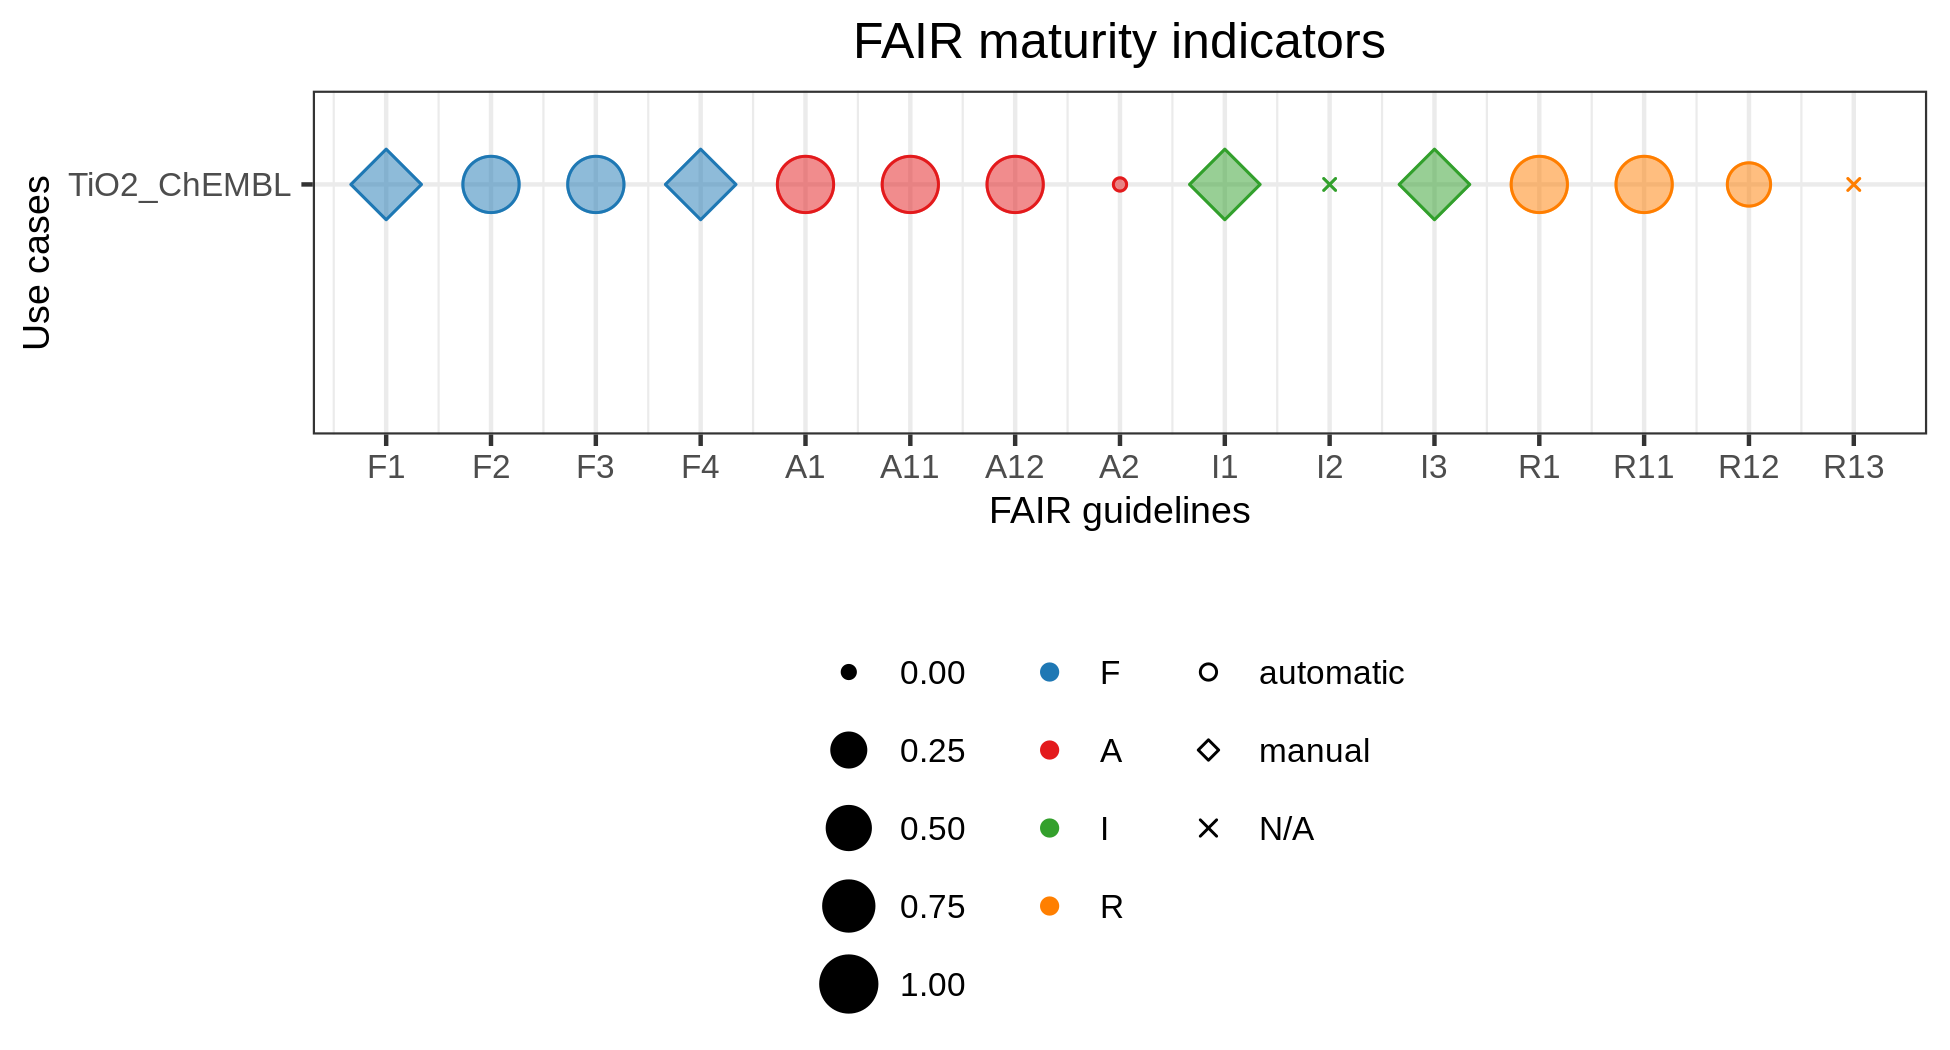

In [62]:
%%R -i df -w 6.5 -h 3.5 --units in -r 300 #-i df 

library(ggplot2)

# variables
y_values   <- seq(1, nrow(df))
y_values   <- sort(y_values, decreasing = TRUE)
n_of_cases <- ncol(df)-3
#n_of_cases <- 4
case_names <- rev(colnames(df)[1:n_of_cases])
# font size
title_text_size <- 12
axis_text_size  <- 9
tick_text_size  <- 8

# initiate graph
pl <- ggplot (data=df, aes(x=x_values1, y=y_values, color=principles, shape=retrieval_type))

# add cases in for loop
for (i in (1:n_of_cases)){

    # create a new dataframe with what needed for the current repository
    # (if one keeps indexes in geom_point, ggplot plots only the last very line - see https://stackoverflow.com/questions/18444620/set-layers-in-ggplot2-via-loop)
    gg.data <- data.frame(current_df=df[i], x_values=rep(i, nrow(df)), principles=df$principles, retrieval_type=df$retrieval_type)
   
    # change specific column name (e.g.DANSEASY) to a generic name
    colnames(gg.data)[1]<-"dataset"
    
    pl <- pl + 
          geom_point(data=gg.data, aes(x=x_values, y=y_values, size=dataset, color=principles, shape=retrieval_type)) + # add size, color, and shape
          geom_point(data=gg.data, aes(x=x_values, y=y_values, size=dataset, fill=principles, shape=retrieval_type), alpha=0.5, show.legend = FALSE) # add fill but do not show the legend (it would be the same as for color)
}

# add layers to plot
pl <- pl +
        # change shapes to squares, circles, and crosses
        scale_shape_manual(values = c(21,23,4)) +
        # background
        theme_bw() +  
        # flip x and y
        coord_flip()  +
        # axis ticks
        scale_x_reverse(limits=c(2.5,0.5), breaks=seq(n_of_cases,1,-1),  labels=c(colnames(df)[n_of_cases:1])) +  
        scale_y_reverse(limits=c(15, 1),   breaks=seq(15,1,-1), labels=df$metric_names) + 
        theme(axis.text.x = element_text(size = tick_text_size)) + 
        theme(axis.text.y = element_text(size = tick_text_size)) +
        # axis text
        xlab ("Use cases") +
        ylab ("FAIR guidelines") +
        theme(text = element_text( size = axis_text_size)) + 
        # change colors for lines
        scale_color_manual(values=c("#e31a1c", "#1f78b4", "#33a02c", "#ff7f00") ,
                           labels = c("F", "A", "I", "R"),
                           breaks = c("F", "A", "I", "R")
                          ) +  
        # change colors for fills
        scale_fill_manual(values=c("#e31a1c", "#1f78b4", "#33a02c", "#ff7f00")) +
        # title
        ggtitle("FAIR maturity indicators") +
        theme(plot.title = element_text(size = title_text_size, hjust = 0.5))  +
        # legend - colors
        theme(legend.text = element_text(size=tick_text_size), legend.key.size = unit(0.2, "cm")) + 
        labs(color="") +                             # no legend title   
        labs(size="")  +                             # no legend title 
        labs(shape="") +                             # no legend title 
        theme (legend.spacing.x = unit(0.1, "cm"),   # reduce horizontal space between legends
               legend.box = "horizontal",            # put legends next to each other
               legend.direction = "vertical",        # 
               legend.position = "bottom",           # under the graph
               legend.key.size = unit(1.3, 'lines'), # space better legend items
               legend.margin=margin(c(1,7,1,1))) +   # margin around each legend 
        guides(color = guide_legend(order=2),        # change legend order
               size  = guide_legend(order=1),
               shape = guide_legend(order=3))
        

# display
ggsave("chembl.png", plot = pl)

pl

In [ ]:
%%R 
# requires the package "svglite" to save as svg
#ggsave("outcome_comparison.svg", plot = last_plot(), width=6.5, height=3.5, dpi=300) # comment if used in mybinder, uncomment if used locally 

---


<a name="dependencies"></a>
## Dependencies 

In [ ]:
%reload_ext watermark
%watermark -v -m -p bs4,os,pandas,requests,xml.etree.ElementTree,io
print ("")
%watermark -u -n -t -z

In [ ]:
%%R
sessionInfo()

In [ ]:
%watermark -u -n -t -z

---

<a name="supplementary_information"></a>
## Supplementary information     

#### Metadata of the dataset in xml:

In [ ]:
for case_id in range (0, 2):

    print ("--> " + repository_name[case_id] + " :")
    pretty_print_xml(metadata_xml[case_id])
    print (" ")
    print ("---------------------------------------------------------------")

#### Metadata of the dataset in lists (no nesting):

In [ ]:
for case_id in range (0, 2):

    print ("--> " + repository_name[case_id] + " :")
    
    for a in range(0,len(metadata_list[case_id][0])):
        print (metadata_list[case_id][0][a] + ": " + metadata_list[case_id][1][a])
    print (" ")
    print ("---------------------------------------------------------------")


#### Metadata of the repositories in xml (no nesting):

In [ ]:
for case_id in range (0, 2):

    print ("--> " + repository_name[case_id] + " :")
    pretty_print_xml(re3data_repo_root[case_id])
    print (" ")
    print ("---------------------------------------------------------------")


#### Metadata of the repositories in lists (no nesting):

In [ ]:
for case_id in range (0, len(repository_name)):

    print ("--> " + repository_name[case_id] + " :")
    
    
    for a in range(0,len(re3data_metadata_list[case_id][0])):
        print (re3data_metadata_list[case_id][0][a] + ": " + re3data_metadata_list[case_id][1][a])
    print (" ")
    print ("---------------------------------------------------------------")